# Visualiación del clasificador

En muchas ocasiones es útil graficar las fronteras del clasificador (hasta dónde se considera que una observación pertenece a una clase o a otra), aunque generalmente solo lo podemos hacer en 2 dimensiones (solo una característica vs otra característica). La siguiente función permite realizar esa visualización. Recuerda tener en cuenta que solo se tienen dos dimensiones para graficar y que en ningún momento visualizar la clasificación significa que el proceso de clasificación se haya efectuado por completo. Esta herramienta *** SOLO SIRVE PARA VISUALIZAR ***.

In [23]:
def visualizar_clasificador(clasificador, X, y): #definimos la función. Las entradas son el clasificador (instanciamiento), 
    #la matriz de observaciones y el vector de etiquetas.
    #definimos los máximos valores de X e y para la malla
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0  #definimos los mínimos y máximos de X en la dimensión 1 
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0  #definimos los mínimos y máximos de X en la dimensión 2
    #definimos el paso de la malla (todos los valores que nos permiten graficar las fronteras)
    mesh_step_size = 0.01
    #definimos la malla para x e y
    x_vals, y_vals = np.mgrid[min_x:max_x:mesh_step_size, min_y:max_y:mesh_step_size]
    #corremos el clasificador sobre la malla
    resultados = clasificador.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    #reordenamos la salida
    resultados = resultados.reshape(x_vals.shape)
    #creamos la figura
    plt.figure()
    #elegimos los colores
    plt.pcolormesh(x_vals,y_vals,resultados,cmap=plt.cm.Pastel1)
    #ubicamos los puntos
    plt.scatter(X[:,0],X[:,1],c=y,s=75,edgecolors='black',linewidth=1,cmap=plt.cm.Set1)
    #especificamos los límites de la gráfica
    plt.xlim(x_vals.min(), x_vals.max()) 
    plt.ylim(y_vals.min(), y_vals.max())
    #especificamos los puntos que se visualizarán sobre los ejes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0))) 
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))
    #Graficamos
    plt.show()

** Ejercicio 1**

Para los clasificadores de Regresión Logística y Naive Bayes grafica las fronteras de los clasificadores tanto para el entrenamiento como para la validación. Utiliza para ambos ejercicios la misma base de datos. Selecciona la de tu preferencia.

1. En el caso de Regresión Logística utiliza la mejor combinación de C y preprocesamiento. Haz las pruebas para todos los pares posibles de características. ¿Qué puedes concluir?.
2. Para el caso de Naive Bayes utiliza todas las posibles combinaciones de características. ¿Qué puedes concluir?.

In [15]:
#Información, librerías e importaciones compartidas

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt #importamos la librería para graficar
from sklearn.naive_bayes import GaussianNB #importamos la librería que contiene el clasificador de Bayes
#Primero debes ingresar a la URL del párrafo superior y descargar la base de datos. La encontrarás como wine.data.
#Una vez descargada, guárdala en la misma ruta del notebook

#importamos el archivo de datos que contiene la Base de Dats. El formato es de valores separados por coma.
input_file = 'Data_NaiveBayes.txt'
#Cargamos los datos. Es importante pasar como argumento el delimitador (coma en este caso)
data = np.loadtxt(input_file, delimiter=',')
X,y = data[:,:-1],data[:,-1] #la matriz de observaciones consta de todas las columnas exceptuando la última. El vector de etiquetas
#corresponde a la última columna que está en el archivo

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

def remocion_train_test(X_train,X_test):
    media_train = X_train.mean(axis = 0) # calculamos la media del conjunto de entrenamiento
    desviacion_train = X_train.std(axis = 0) # calculamos la desviacion estándar del conjunto de entrenamiento
    
    X_train_rem = (X_train - media_train)/desviacion_train # preprocesamos la matriz de entrenamiento
    X_test_rem = (X_test - media_train)/desviacion_train # preprocesamos la matriz de validacion o test
    
    return X_train_rem, X_test_rem

X_train_remocion, X_test_remocion = remocion_train_test(X_train[:,0:2], X_test[:,0:2])

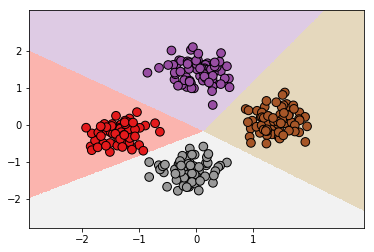

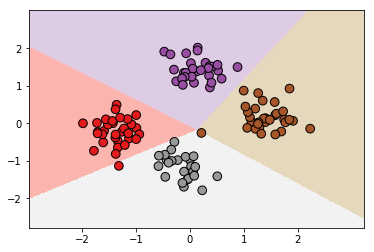

In [24]:
#espacio para la solución del ejercicio 1

clasificador1 = LogisticRegression(C=670.0, random_state = 0) 
clasificador1.fit(X_train_remocion,y_train)

visualizar_clasificador(clasificador1, X_train_remocion, y_train)
visualizar_clasificador(clasificador1, X_test_remocion, y_test)

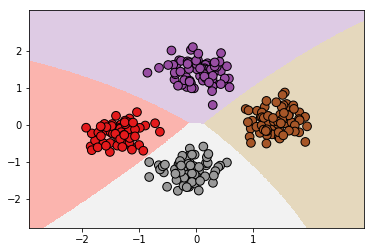

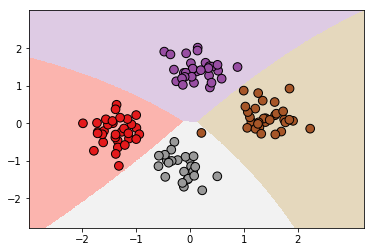

In [25]:
#espacio para la solución del ejercicio 2

clasificador = GaussianNB() #instanciamos el clasificador
clasificador.fit(X_train_remocion,y_train) #entrenamos el clasificador con la matriz de entranamiento pre-procesada
# print(X_test_remocion.shape)
# y_predict = clasificador.predict(X_test_remocion) #validamos el clasificador sobre el conjunto de entrenamiento
# acc = 100.0*(y_test == y_predict).sum()/X_test_remocion.shape[0] #calculamos el acierto de clasificación
# print('El acierto de clasificación es del ',acc , '%') #imprimimos el acierto de clasificacion

visualizar_clasificador(clasificador, X_train_remocion, y_train)
visualizar_clasificador(clasificador, X_test_remocion, y_test)

In [ ]:
# Conclusiones
print('Primero que todo, los colores son muy feos, y segundo que todo, el clasificados gaussiano separó mejor los datos por lo tanto es mejor en general')